In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X = df.drop('Target',axis=1)
y = df['Target']

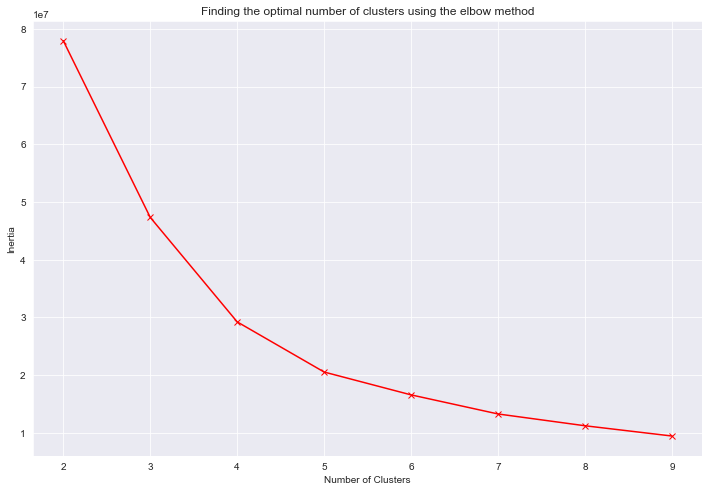

In [7]:
## finding the optimal number of clusters using the inerta (elbow method)

from sklearn.cluster import KMeans

inertia_list = [KMeans(n_clusters=i).fit(X).inertia_ for i in range(2,10)]

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)), inertia_list, 'rx', ls='solid')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Finding the optimal number of clusters using the elbow method');

**Looking at the graph is seems appropriate to consider the optimal number of clusters could be 5. Let's confirm it using more precise method**

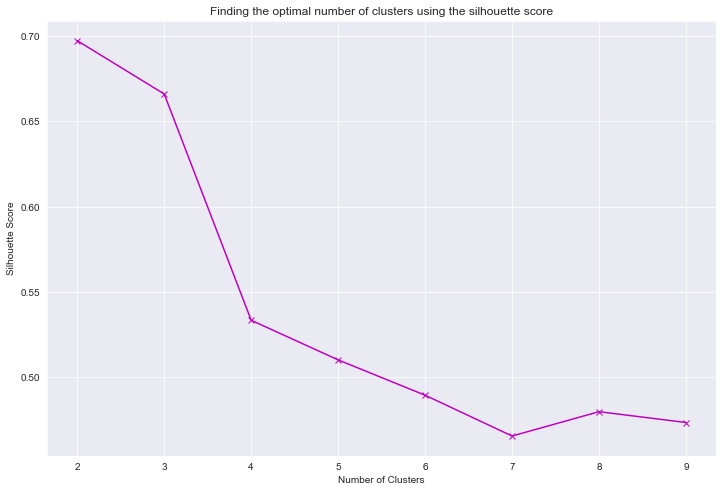

In [8]:
## using the silhouette score to find the optimal number of clusters for the kmeans model
from sklearn.metrics import silhouette_score
sil_score_list = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sil_score_list.append(silhouette_score(X, kmeans.labels_))


    
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(list(range(2,10)), sil_score_list, 'mx', ls='solid')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Finding the optimal number of clusters using the silhouette score');

**Here by looking at the plot, we can tell even though silhouette score is high for cluster number 2,3, we cannot select them since in that case inertal will be too high for those clusters**

In [10]:
## finding the optimal number of clusters using kneed library
from kneed import KneeLocator

kn = KneeLocator(range(2,10), inertia_list, curve='convex',direction='decreasing')
print(f"The optimal number of clusters for the kmeans model: {kn.knee}")

The optimal number of clusters for the kmeans model: 4


In [11]:
## clustering the data with number of cluster equal to 4
kmeans_final = KMeans(n_clusters=4)
kmeans_final.fit(X)
pred = kmeans_final.predict(X)
df['Clusters'] = pred

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target,Clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,3
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,3
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,3
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,3
